## Glasses,No-Glasses Images Classification using Neural Net and OpenCv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
import pathlib

In [2]:
data_path = pathlib.Path('DataSets/Images')

In [3]:
glasses_path = data_path.glob('glasses/*.jpg')

In [4]:
no_glasses_path = data_path.glob('no_glasses/*.jpg')

In [5]:
glasses_data = list(data_path.glob('glasses/*.jpg'))

In [6]:
no_glasses_data = list(data_path.glob('no_glasses/*.jpg'))

In [7]:
# cv2.imread(str(glasses_data[0]))

In [8]:
classes_data = {
    
    'glasses': glasses_data,
    'no_glasses': no_glasses_data
}

In [9]:
classes_labels = {
    
    'glasses': 0,
    'no_glasses': 1
}

In [10]:
X,y = [],[]

for class_name , images in classes_data.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img,(180,180))
        X.append(resize_image)
        y.append(classes_labels[class_name])
        

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X_scale = X / 255

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.2)

In [14]:
model = keras.Sequential([
    
#     cnn
    keras.layers.Conv2D(40,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(80,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(100,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    
#     dense
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(2,activation = 'softmax')



])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
123/123 [==============================] - 95s 746ms/step - loss: 0.2705 - accuracy: 0.8483
Epoch 2/5
123/123 [==============================] - 91s 738ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 3/5
123/123 [==============================] - 88s 712ms/step - loss: 0.0204 - accuracy: 0.9942
Epoch 4/5
123/123 [==============================] - 94s 766ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 5/5
123/123 [==============================] - 91s 742ms/step - loss: 0.0044 - accuracy: 0.9987


In [16]:
model.evaluate(X_test,y_test)

31/31 [==============================] - 7s 219ms/step - loss: 0.0054 - accuracy: 0.9990


[0.005382537376135588, 0.9989837408065796]

In [17]:
y_p = model.predict(X_test)

In [18]:
predicted = []
for i in range(len(y_p)):
    predicted.append(np.argmax(y_p[i]))

In [19]:
predicted[:10]

[1, 1, 1, 1, 0, 0, 1, 0, 0, 0]

In [20]:
truth = y_test
truth[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(truth,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00       429

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



<AxesSubplot:>

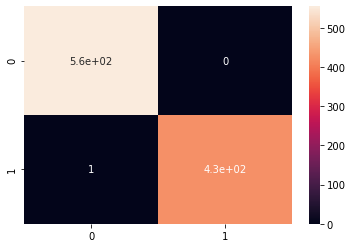

In [22]:
cm = confusion_matrix(truth,predicted)
import seaborn as sn
sn.heatmap(cm , annot = True)

In [23]:
my_data_path = 'DataSets'

In [24]:
my_data = pathlib.Path(my_data_path)
my_data

WindowsPath('DataSets')

In [25]:
glasses_data = list(my_data.glob('My_Glasses_Data/*.jpg'))

In [26]:
glasses_data[:]

[WindowsPath('DataSets/My_Glasses_Data/glasses.1.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.2.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.3.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.4.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.5.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.6.jpg'),
 WindowsPath('DataSets/My_Glasses_Data/glasses.7.jpg')]

In [27]:
resize_imgs = []
for i in range(len(glasses_data)):
    img = cv2.imread(str(glasses_data[i]))
    resize = cv2.resize(img,(180,180))
    resize_imgs.append(resize)

In [28]:
resize_imgs = np.array(resize_imgs)

In [29]:
my_glasses_data = resize_imgs / 255

In [30]:
my_glasses_data.shape

(7, 180, 180, 3)

In [31]:
my_p = model.predict(my_glasses_data)

In [32]:
my_prediction = []
for i in range(len(my_p)):
    my_prediction.append(np.argmax(my_p[i]))

In [33]:
my_prediction

[0, 0, 1, 0, 1, 1, 0]

In [41]:
# plt.imshow(resize_imgs[0])

In [42]:
# plt.imshow(resize_imgs[1])

In [43]:
# plt.imshow(resize_imgs[2])

In [44]:
# plt.imshow(resize_imgs[3])

In [45]:
# plt.imshow(resize_imgs[4])

In [46]:
# plt.imshow(resize_imgs[5])

In [47]:
# plt.imshow(resize_imgs[6])